# Example code (B) 
## *The Statistical Trends of Protein Evolution: A Lesson from AlphaFold Database*

Qian-Yuan Tang, Weitong Ren, Jun Wang, Kunihiko Kaneko

Contact: tangqianyuan[at]gmail.com

## B. Statistical analysis and scaling analysis

In this Jupyter notebook, we will load the data (calculation results) and perform statistical analysis and scaling analysis.

### 1. Load data

In [1]:
# Load species names

name_species = {'METJA': 'Methanocaldococcus jannaschii', 
                'STAA8': 'Staphylococcus aureus', 
                'ECOLI': 'Escherichia coli', 
                'MYCTU': 'Mycobacterium tuberculosis', 
                'YEAST': 'Saccharomyces cerevisiae', 
                'SCHPO': 'Schizosaccharomyces pombe', 
                'DICDI': 'Dictyostelium discoideum', 
                'LEIIN': 'Leishmania infantum', 
                'CANAL': 'Candida albicans', 
                'DROME': 'Drosophila melanogaster', 
                'CAEEL': 'Caenorhabditis elegans', 
                'SOYBN': 'Glycine max', 
                'ARATH': 'Arabidopsis thaliana', 
                'MAIZE': 'Zea mays', 
                'PLAF7': 'Plasmodium falciparum', 
                'DANRE': 'Danio rerio', 
                'ORYSJ': 'Oryza sativa', 
                'RAT': 'Rattus norvegicus', 
                'HUMAN': 'Homo sapiens', 
                'TRYCC': 'Trypanosoma cruzi', 
                'MOUSE': 'Mus musculus', 
                'AJECG': 'Ajellomyces capsulatus', 
                'BRUMA': 'Brugia malayi', 
                'CAMJE': 'Campylobacter jejuni', 
                '9EURO1': 'Cladophialophora carrionii', 
                'DRAME': 'Dracunculus medinensis', 
                'ENTFC': 'Enterococcus faecium', 
                '9EURO2': 'Fonsecaea pedrosoi', 
                'HAEIN': 'Haemophilus influenzae', 
                'HELPY': 'Helicobacter pylori', 
                'KLEPH': 'Klebsiella pneumoniae', 
                '9PEZI1': 'Madurella mycetomatis', 
                'MYCLE': 'Mycobacterium leprae', 
                'MYCUL': 'Mycobacterium ulcerans', 
                'NEIG1': 'Neisseria gonorrhoeae', 
                '9NOCA1': 'Nocardia brasiliensis', 
                'ONCVO': 'Onchocerca volvulus', 
                'PARBA': 'Paracoccidioides lutzii', 
                'PSEAE': 'Pseudomonas aeruginosa', 
                'SALTY': 'Salmonella typhimurium', 
                'SCHMA': 'Schistosoma mansoni', 
                'SHIDS': 'Shigella dysenteriae', 
                'SPOS1': 'Sporothrix schenckii', 
                'STRR6': 'Streptococcus pneumoniae', 
                'STRER': 'Strongyloides stercoralis', 
                'TRITR': 'Trichuris trichiura', 
                'TRYB2': 'Trypanosoma brucei', 
                'WUCBA': 'Wuchereria bancrofti'}

Model = ['METJA', 'ECOLI', 'YEAST', 'SCHPO', 'DICDI', 
         'CANAL', 'DROME', 'CAEEL', 'SOYBN', 'ARATH', 
         'MAIZE', 'DANRE', 'ORYSJ', 'RAT', 'HUMAN', 
         'MOUSE']

Health = ['AJECG', 'BRUMA', 'CAMJE', '9EURO1', 'DRAME', 
          'ENTFC', '9EURO2', 'HAEIN', 'HELPY', 'KLEPH', 
          'LEIIN', '9PEZI1', 'MYCLE', 'MYCTU', 'MYCUL', 
          'NEIG1', '9NOCA1', 'ONCVO', 'PARBA', 'PLAF7', 
          'PSEAE', 'SALTY', 'SCHMA', 'SHIDS', 'SPOS1', 
          'STAA8', 'STRR6', 'STRER', 'TRITR', 'TRYB2', 
          'TRYCC', 'WUCBA']

In [2]:
# Load data
import os
import numpy as np

data = {}

# Load data of Rg (radius of gyration)
for organism in name_species:
    filename = os.path.join('Data', 'Data_' + organism + '.txt')
    data[organism] = np.loadtxt(filename)
    
# Load data of complexity
complexity = {}
f = open(os.path.join('Data', 'Organismal_Complexity.txt'), 'r')
while True:
    # read file (line by line)
    line = f.readline()
    if len(line)<2: break
    xline = line.split()
    complexity[xline[0]] = [float(xline[1]), float(xline[2])]
f.close()

### 2. Calculate normalized Rg

In [3]:
# Normalize Rg

normalized_Rg = {}

Median_normalized_Rg = {}

for organism in name_species:
    normalized_Rg[organism] = []
    for dataline in data[organism]:
        N = dataline[0]
        Rg = dataline[1]
        norm_Rg = Rg/((N)**(1./3.))
        normalized_Rg[organism].append(norm_Rg)
    # Get the median of the normalized Rg
    Median_normalized_Rg[organism] = np.median(normalized_Rg[organism])

#Proteins vs. Normalized Rg
Pearson correlation 0.7829687636721201
p-value 4.844310203081078e-11

#Residues vs. Normalized Rg
Pearson correlation 0.8481274575571653
p-value 2.7869717661225785e-14


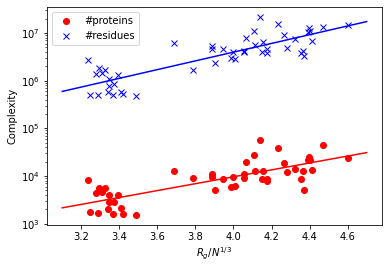

In [4]:
# Plot normalized Rg vs. measures of complexity

import matplotlib.pyplot as plt

x = []
y = []
z = []

for organism in name_species:
    x.append(Median_normalized_Rg[organism])
    y.append(complexity[organism][0])
    z.append(complexity[organism][1])

# Convert list into numpy arrays
x = np.array(x) # Normalized Rg
y = np.array(y) # Number of proteins
z = np.array(z) # Number of residues
    
plt.semilogy(x, y, 'ro', label='#proteins')
plt.semilogy(x, z, 'bx', label='#residues')

plt.xlabel('$R_g/N^{1/3}$')
plt.ylabel('Complexity')
plt.legend()

# Fitting and plot the curves

kb_y = np.polyfit(x, np.log(y), 1)  
tmpx = np.array([3.1 + 0.1*i for i in range(17)])
tmpy = np.exp(kb_y[0] * tmpx + kb_y[1])
plt.plot(tmpx, tmpy, 'r-')

kb_z = np.polyfit(x, np.log(z), 1)
tmpz = np.exp(kb_z[0] * tmpx + kb_z[1])
plt.plot(tmpx, tmpz, 'b-')


# Package scipy is necessary for the calculation of Pearson correlation and p-values
import scipy.stats  
r, p = scipy.stats.pearsonr(np.log(y), x)
print('#Proteins vs. Normalized Rg')
print('Pearson correlation', r)
print('p-value', p)

print()

r, p = scipy.stats.pearsonr(np.log(z), x)
print('#Residues vs. Normalized Rg')
print('Pearson correlation', r)
print('p-value', p)

In [5]:
# KS test
# Load scipy for the two-sample KS test
from scipy.stats import ks_2samp

DataA = normalized_Rg['ECOLI']
DataB = normalized_Rg['METJA']
ksstat, pval = ks_2samp(DataA, DataB)
invnm = (len(DataA) + len(DataB))/(len(DataA) * len(DataB))
ksnorm = ksstat/(invnm**0.5)

print('ECOLI vs METJA')
print('KS Statistic D =', round(ksstat, 6))
print('p-value =', round(pval, 6))
print('tau(alpha=0.01) =', round(ksnorm/1.628,6))
print('tau(alpha=0.001) =', round(ksnorm/1.949,6))

print()

DataA = normalized_Rg['ECOLI']
DataB = normalized_Rg['HUMAN']
ksstat, pval = ks_2samp(DataA, DataB)
invnm = (len(DataA) + len(DataB))/(len(DataA) * len(DataB))
ksnorm = ksstat/(invnm**0.5)

print('ECOLI vs HUMAN')
print('KS Statistic D =', round(ksstat, 6))
print('p-value =', round(pval, 6))
print('tau(alpha=0.01) =', round(ksnorm/1.628,6))
print('tau(alpha=0.001) =', round(ksnorm/1.949,6))

print()

DataA = normalized_Rg['MOUSE']
DataB = normalized_Rg['HUMAN']
ksstat, pval = ks_2samp(DataA, DataB)
invnm = (len(DataA) + len(DataB))/(len(DataA) * len(DataB))
ksnorm = ksstat/(invnm**0.5)

print('MOUSE vs HUMAN')
print('KS Statistic D =', round(ksstat, 6))
print('p-value =', round(pval, 6))
print('tau(alpha=0.01) =', round(ksnorm/1.628,6))
print('tau(alpha=0.001) =', round(ksnorm/1.949,6))

ECOLI vs METJA
KS Statistic D = 0.065829
p-value = 3.4e-05
tau(alpha=0.01) = 1.435706
tau(alpha=0.001) = 1.199246

ECOLI vs HUMAN
KS Statistic D = 0.463349
p-value = 0.0
tau(alpha=0.01) = 17.258689
tau(alpha=0.001) = 14.416185

MOUSE vs HUMAN
KS Statistic D = 0.079318
p-value = 0.0
tau(alpha=0.01) = 5.163974
tau(alpha=0.001) = 4.313468


### 3. Select proteins with similar chain lengths

In [6]:
# Select protein with chain length N ~ 250

Nmin = 225
Nmax = 275

Rg_selected = {}
Median_selected_Rg = {}
for organism in name_species:
    Rg_selected[organism] = []
    for dataline in data[organism]:
        N = dataline[0]
        Rg = dataline[1]
        if N>=Nmin and N<Nmax:
            Rg_selected[organism].append(Rg)
    Median_selected_Rg[organism] = np.median(Rg_selected[organism])

#Proteins vs. Rg (N ~ 250)
Pearson correlation 0.8197116351723689
p-value 1.0412160812104868e-12

#Residues vs. Rg (N ~ 250)
Pearson correlation 0.8751033493159206
p-value 4.204008453551541e-16


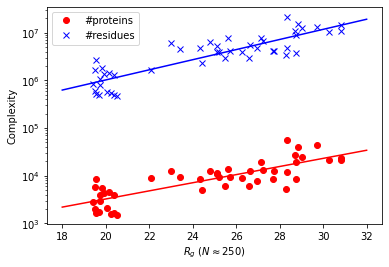

In [7]:
# For proteins with similar chain lengths
# Plot Rg vs. measures of complexity

import matplotlib.pyplot as plt

x = []
y = []
z = []

for organism in name_species:
    x.append(Median_selected_Rg[organism])
    y.append(complexity[organism][0])
    z.append(complexity[organism][1])

# Convert list into numpy arrays
x = np.array(x) # Normalized Rg
y = np.array(y) # Number of proteins
z = np.array(z) # Number of residues
    
plt.semilogy(x, y, 'ro', label='#proteins')
plt.semilogy(x, z, 'bx', label='#residues')

plt.xlabel('$R_g$ ($N \\approx $250)')
plt.ylabel('Complexity')
plt.legend()

# Fitting and plot the curves

kb_y = np.polyfit(x, np.log(y), 1)  
tmpx = np.array([18 + 1.*i for i in range(15)])
tmpy = np.exp(kb_y[0] * tmpx + kb_y[1])
plt.plot(tmpx, tmpy, 'r-')

kb_z = np.polyfit(x, np.log(z), 1)
tmpz = np.exp(kb_z[0] * tmpx + kb_z[1])
plt.plot(tmpx, tmpz, 'b-')


# Package scipy is necessary for the calculation of Pearson correlation and p-values
import scipy.stats  
r, p = scipy.stats.pearsonr(np.log(y), x)
print('#Proteins vs. Rg (N ~ 250)')
print('Pearson correlation', r)
print('p-value', p)

print()

r, p = scipy.stats.pearsonr(np.log(z), x)
print('#Residues vs. Rg (N ~ 250)')
print('Pearson correlation', r)
print('p-value', p)

### 4. Scaling analysis

In [8]:
# Select two organisms for the analysis

selected_organism = ['ECOLI', 'HUMAN']

# Collect the data of the lengths of the shortest semi-axis (L_c)
N_data = {}
Lc_data = {}
for organism in name_species:
    N_data[organism] = data[organism][:,0] # First column
    Lc_data[organism] = data[organism][:,-3] # Last column (length of the shortest semi-axis)

ECOLI d =  2.440062 ( 2.57334 2.285469 )
HUMAN d =  1.990558 ( 2.057837 1.912596 )


Text(0, 0.5, '$L_c$')

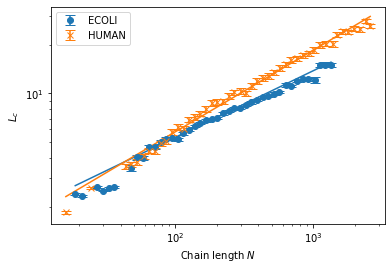

In [9]:
mean_summary_dict = {}
stderr_summary_dict = {}

colors = ['C0', 'C1']
fmts = ['o', 'x']

ci = 0
for organism in selected_organism:
    xx = {}
    yy = {}
    for i in range(len(N_data[organism])):
        # divide the data into bins
        intN = int(np.log(N_data[organism][i]/10.)/np.log(1.1)) 
        if not intN in xx:
            xx[intN] = []
            yy[intN] = []
        xx[intN].append(N_data[organism][i])
        yy[intN].append(Lc_data[organism][i])

    
    summary_x = []
    summary_y = []
    summary_stderry = []
    for intN in range(100):
        if intN in xx:
            if len(xx[intN])>=10:
                summary_x.append(np.mean(np.array(xx[intN])))
                summary_y.append(np.mean(np.array(yy[intN])))
                summary_stderry.append(np.std(np.array(yy[intN]))/(len(yy)**0.5))
    # Plot the data
    plt.errorbar(summary_x, summary_y, yerr=summary_stderry, fmt=fmts[ci], capsize=5, label=organism, color=colors[ci])

    # Fit the scaling coefficient with Theil–Sen estimators 
    res = scipy.stats.theilslopes(np.log(np.array(summary_y)), np.log(np.array(summary_x)))
    print(organism, 'd = ', round(1./res[0], 6), '(', round(1./res[2], 6), round(1./res[3], 6), ')')
    
    # Plot the fitted curve
    fitted_y = np.exp(res[0]*np.log(np.array(summary_x)) + res[1])
    plt.plot(summary_x, fitted_y, color=colors[ci])
    
    ci += 1
    
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Chain length $N$')
plt.ylabel('$L_c$')